In [23]:
import pandas as pd
import random

# READING DATAFRAME


In [3]:
df = pd.read_csv("ds_salaries.csv")
print(df.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [4]:
from utils import generate_working_hour_means, generate_working_hours

distribution_mean = generate_working_hour_means(df)
df = generate_working_hours(df, distribution_mean)

In [5]:
print(df.weekly_hours)

0       41.212528
1       43.590490
2       40.578453
3       50.018510
4       49.024045
          ...    
3750    45.149943
3751    36.447330
3752    37.305370
3753    49.152943
3754    34.061284
Name: weekly_hours, Length: 3755, dtype: float64


In [6]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame named df with 'experience_level' column

# Define a function to generate ages based on experience level


def generate_age(experience_level):
    if experience_level == "SE":
        # Normal distribution, most between 35 and 45
        return int(np.random.normal(loc=40, scale=5))
    elif experience_level == "EX":
        # Most between 47.5 and 57.5
        return int(np.random.normal(loc=52.5, scale=5))
    elif experience_level == "MI":
        return int(np.random.normal(loc=30, scale=5))  # Most between 25 and 35
    elif experience_level == "EN":
        # Most between 18 and 25
        return int(np.random.normal(loc=21.5, scale=2.5))
    else:
        return None


# Apply the function to create the 'age' column
df['age'] = df['experience_level'].apply(generate_age)

In [7]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame named df with 'salary_in_usd' column

# Define a function to generate gender based on salary


def generate_gender(salary):
    # Adjust mean and standard deviation as needed
    male_mean, male_std = 80000, 15000
    female_mean, female_std = 60000, 15000

    # Generate salary based on gender
    if np.random.rand() < 0.5:  # 50% chance for each gender
        return "Male" if salary > np.random.normal(male_mean, male_std) else "Female"
    else:
        return "Female" if salary < np.random.normal(female_mean, female_std) else "Male"


# Apply the function to create the 'gender' column
df['gender'] = df['salary_in_usd'].apply(generate_gender)

In [8]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'weekly_hours',
       'age', 'gender'],
      dtype='object')

# DATA CLEANING


In [10]:
# check for missing
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
weekly_hours          0
age                   0
gender                0
dtype: int64

In [11]:
# Check for duplicates
df.duplicated().sum()

0

In [12]:
df.to_csv('df_salaries.csv', index=False)

# Plots


In [76]:
# read csv
df = pd.read_csv('df_salaries.csv')

In [53]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,weekly_hours,age,gender
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,41.212528,42,Male
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,43.590490,29,Female
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,40.578453,31,Female
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,50.018510,46,Male
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,49.024045,37,Male


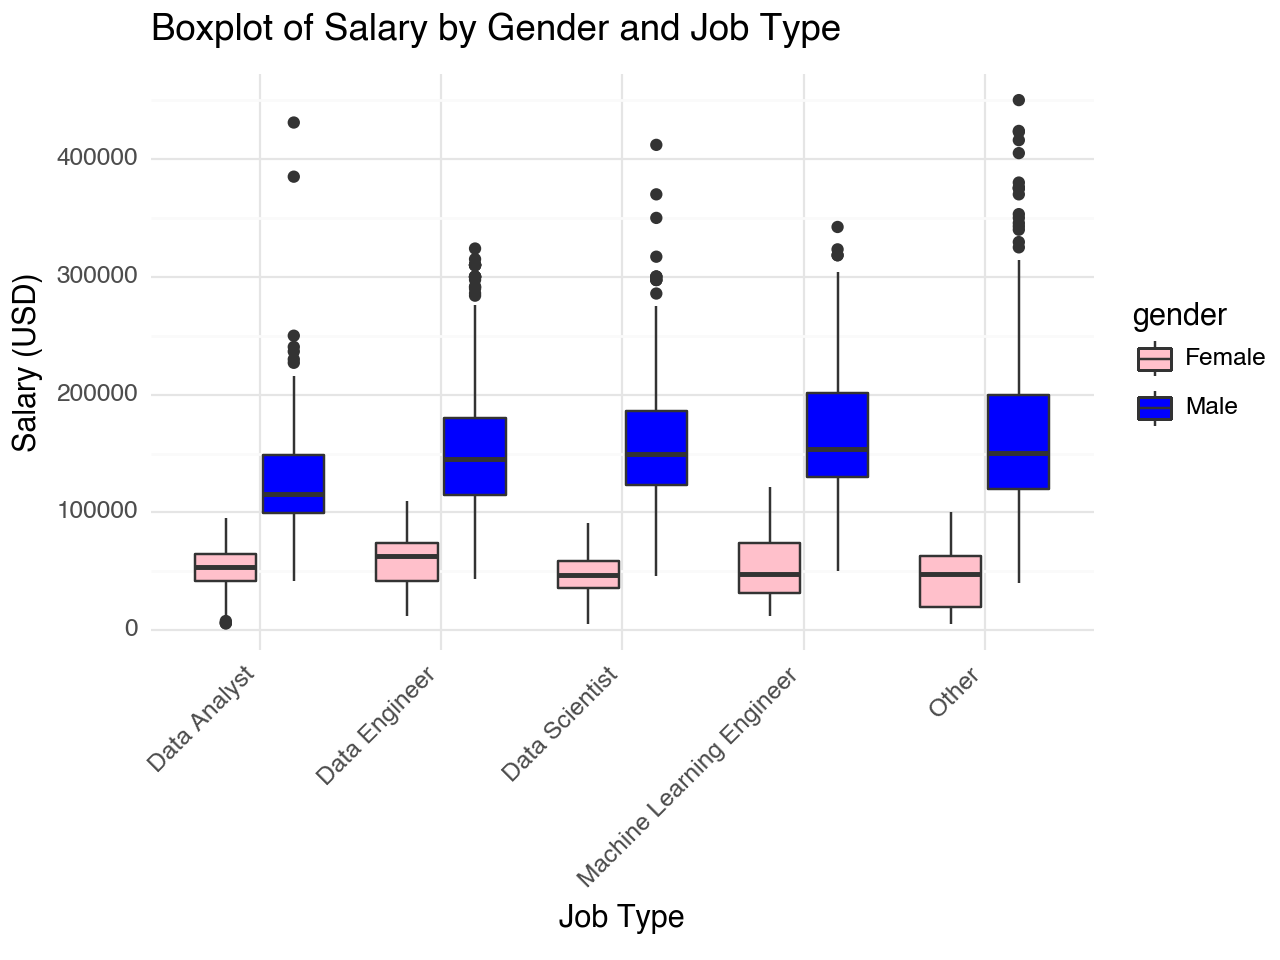

In [78]:
from plotnine import ggplot, aes, geom_boxplot, theme_minimal, labs, scale_fill_manual, theme, element_text


top_job_titles = df['job_title'].value_counts().nlargest(4).index
df['job_title_grouped'] = df['job_title'].apply(
    lambda x: x if x in top_job_titles else 'Other')

# Plotting using plotnine
plot = (
    ggplot(df, aes(x='job_title_grouped', y='salary_in_usd', fill='gender')) +
    geom_boxplot() +
    labs(title='Boxplot of Salary by Gender and Job Type', x='Job Type', y='Salary (USD)') +
    theme_minimal() +
    scale_fill_manual(values={'Male': 'blue', 'Female': 'pink'}) +
    # Set the angle to 45 degrees
    theme(axis_text_x=element_text(angle=45, hjust=1))
)

# Show the plot
print(plot)

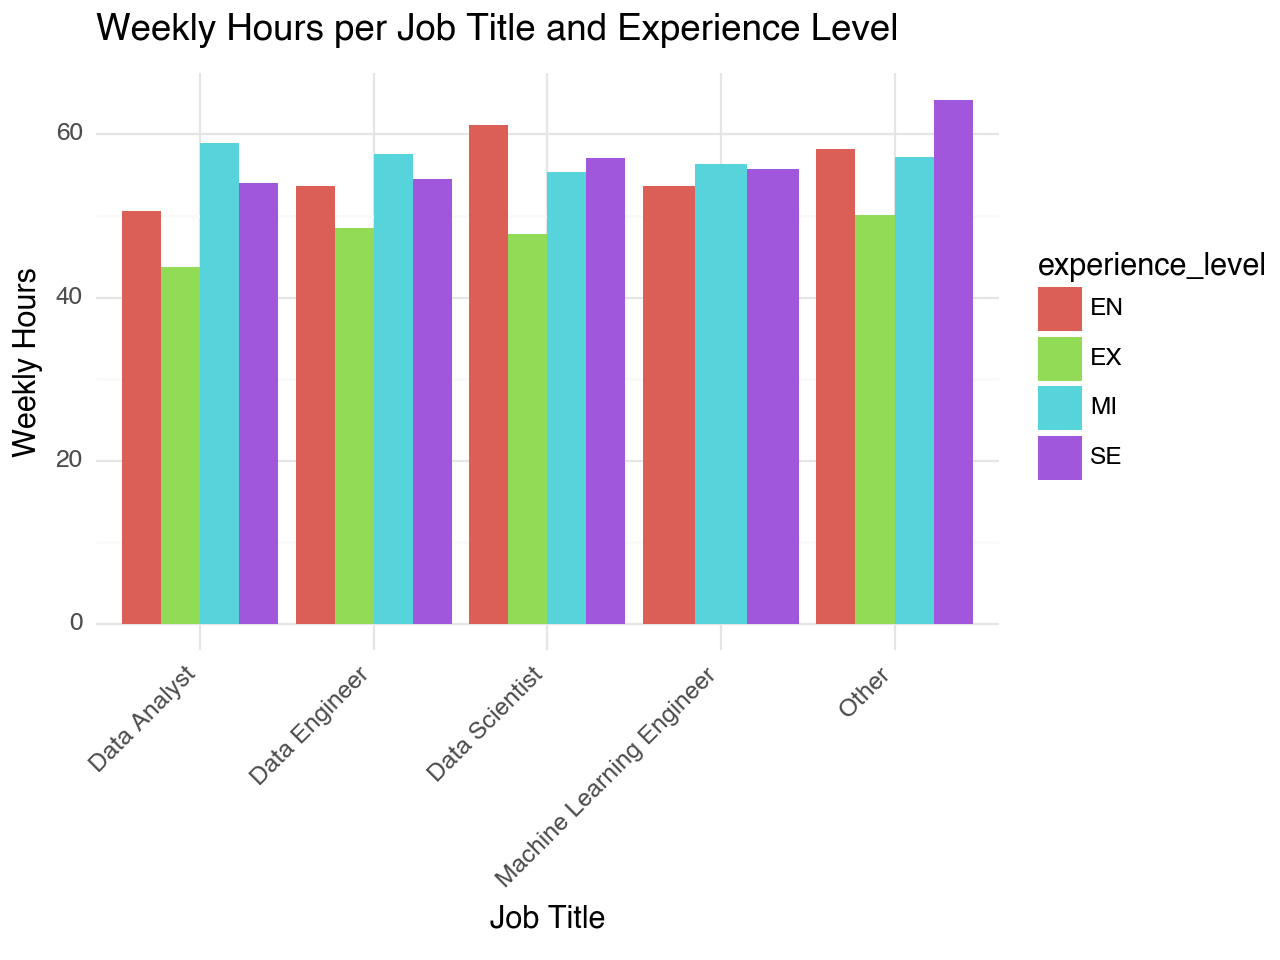

In [79]:

from plotnine import ggplot, aes, geom_bar, theme_minimal, labs, theme, element_text


top_job_titles = df['job_title'].value_counts().nlargest(4).index
df['job_title_grouped'] = df['job_title'].apply(
    lambda x: x if x in top_job_titles else 'Other')

# Plotting using plotnine
plot = (
    ggplot(df, aes(x='job_title_grouped', y='weekly_hours', fill='experience_level')) +
    geom_bar(stat='identity', position='dodge') +
    labs(title='Weekly Hours per Job Title and Experience Level',
         x='Job Title', y='Weekly Hours') +
    theme_minimal() +
    # Set the angle to 45 degrees
    theme(axis_text_x=element_text(angle=45, hjust=1))
)

# Show the plot
print(plot)

In [80]:
df.remote_ratio.unique()

array([100,   0,  50])

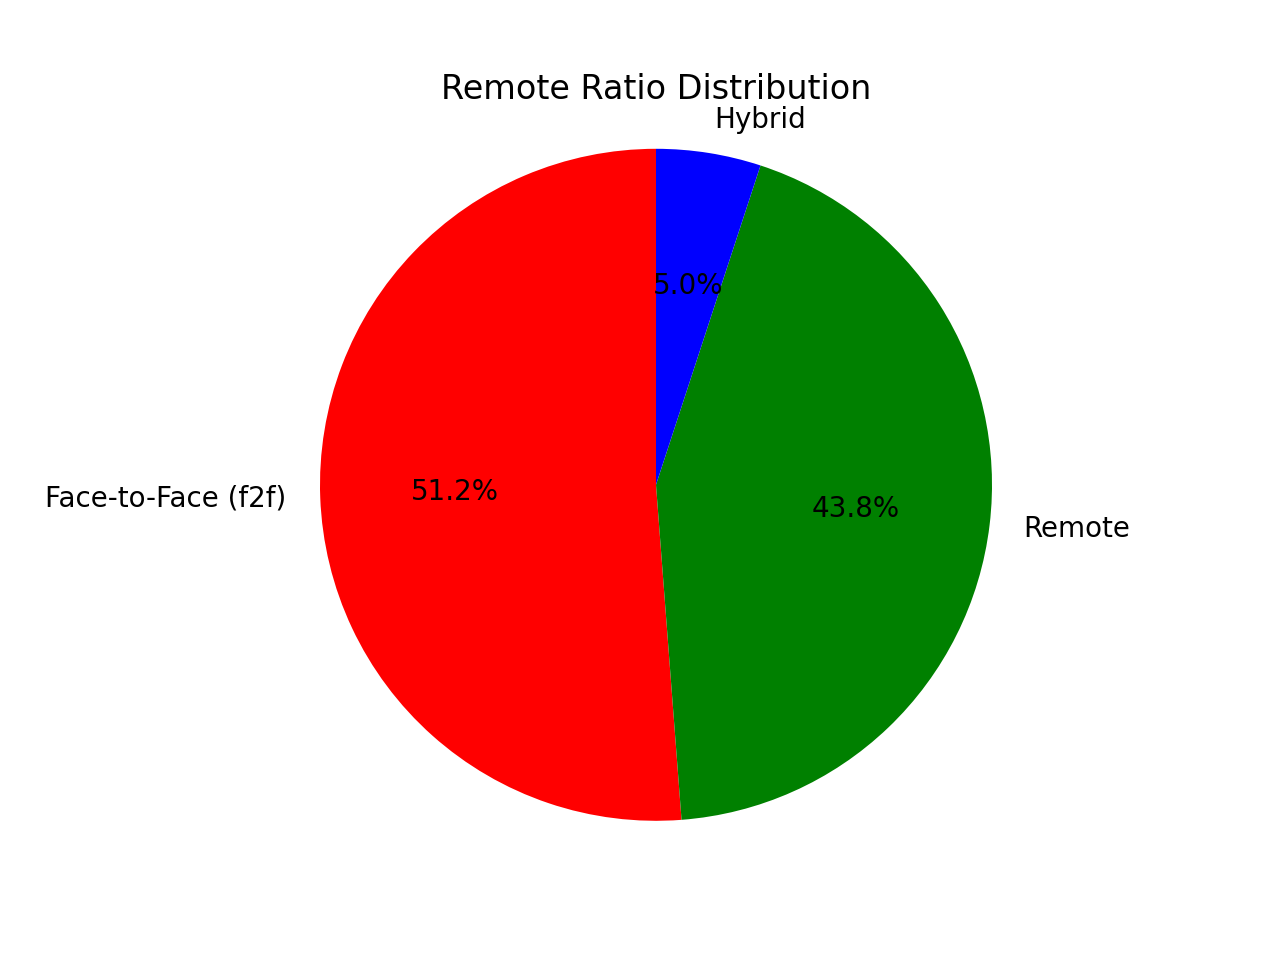

In [81]:
import matplotlib.pyplot as plt



df['remote_category'] = df['remote_ratio'].map({0: 'Face-to-Face (f2f)', 50: 'Hybrid', 100: 'Remote'})

# Count occurrences of each category
category_counts = df['remote_category'].value_counts()

# Plotting using matplotlib
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue'])
plt.title('Remote Ratio Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

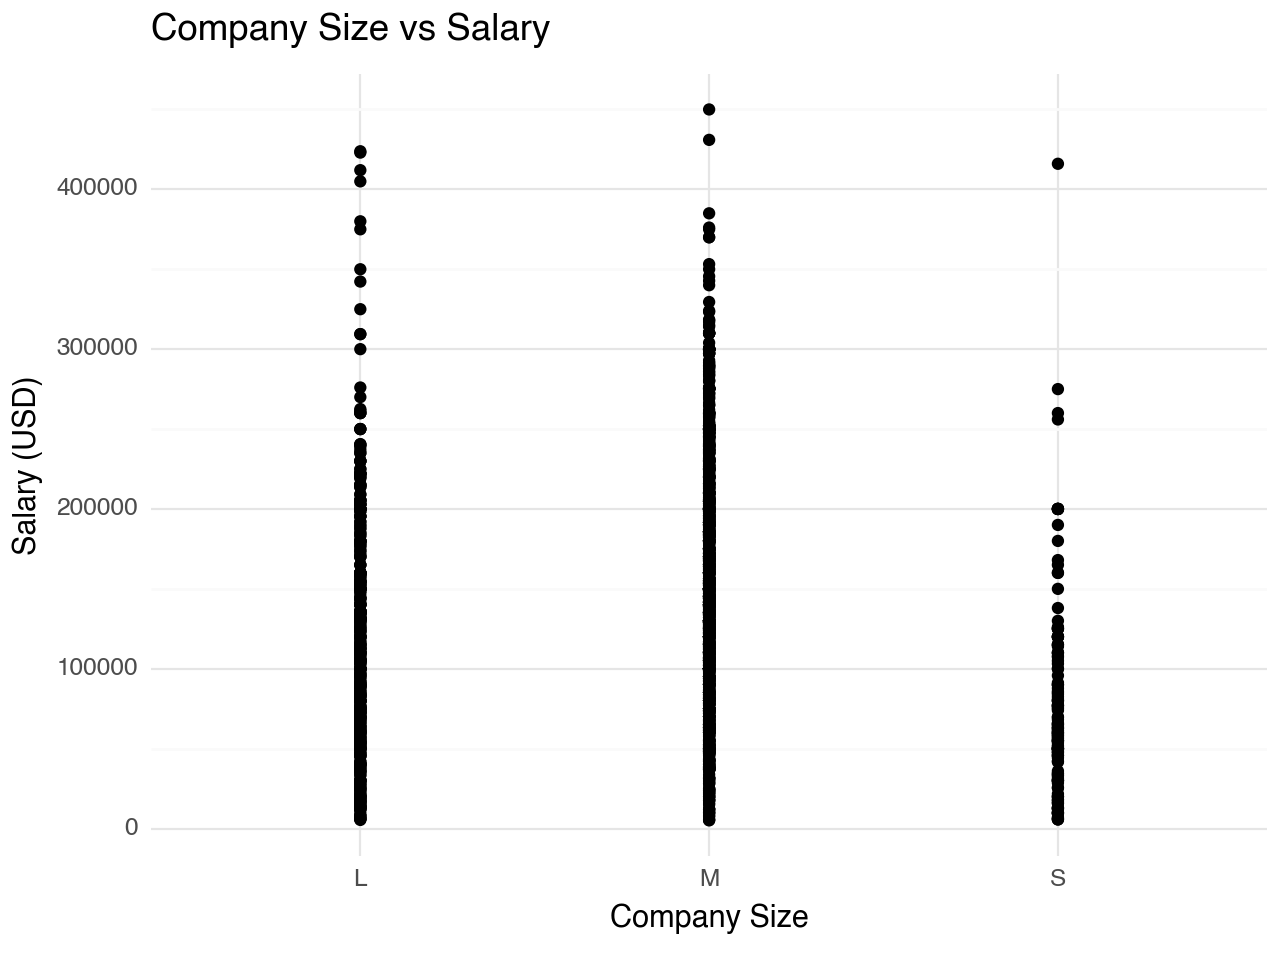

In [82]:
from plotnine import ggplot, aes, geom_point, theme_minimal, labs


plot = (
    ggplot(df, aes(x='company_size', y='salary_in_usd')) +
    geom_point() +
    labs(title='Company Size vs Salary',
         x='Company Size', y='Salary (USD)') +
    theme_minimal()
)

# Show the plot
print(plot)
